In [7]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import numpy as np
import time 
# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(3,4)
imu2 = Grove_IMU(2,4)
accX=list()
accY=list()
accZ=list()
pitch_l=list()

accX2=list()
accY2=list()
accZ2=list()
pitch_l2=list()
while(True):
    try:

        start=time.time()
        # get data from accelerometer
        accl = imu.get_accl()
        accl2 = imu2.get_accl()
                
        #calculate pitch from accelerations
        argomento= accl[1]/np.sqrt(accl[0]*accl[0]*accl[1]*accl[1])
        argomento2= accl2[1]/np.sqrt(accl2[0]*accl2[0]*accl2[1]*accl2[1])
        pitch = np.arctan(argomento)
        pitch2 = np.arctan(argomento2)
        
        accX.append(accl[0])
        accY.append(accl[1])
        accZ.append(accl[2])
        pitch_l.append(pitch)
        
        accX2.append(accl2[0])
        accY2.append(accl2[1])
        accZ2.append(accl2[2])
        pitch_l2.append(pitch2)
        
        time.sleep(0.05)
        
    


    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        end=time.time()
        
        break
         
np.savetxt("pillowONLINEfermo.npy",pitch_l)
np.savetxt("pillowONLINE2fermo.npy",pitch_l2)

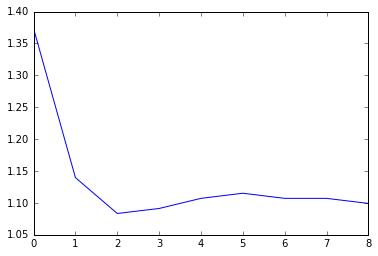

9
[ 1.37340077  1.13965759]
2


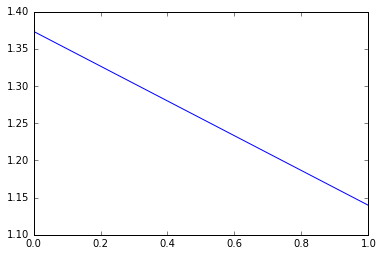

In [7]:
#definizione template di discesa sul lato destro quando mi giro a destra
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import numpy as np
import time 
import matplotlib.pyplot as plt

data=np.loadtxt("pillowTUTTOSINISTRA2.npy")

plt.plot(np.arange(len(data)),data)
plt.show()
print(len(data))

#finestriamo il segnale solo la discesa 

wnd=data[0:2]
print(wnd)
print(len(wnd))
plt.plot(np.arange(len(wnd)),wnd)
plt.show()
np.savetxt("finestra_sinistra_basso.npy",wnd)

99
99
98


ValueError: x and y must have same first dimension

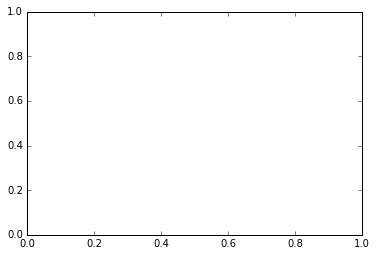

In [31]:
#cross-correlazione del template con il segnale generico
import numpy as np
from numpy.fft import rfft, irfft

dati=np.loadtxt("pillowP.npy")
print(len(dati))


template=wnd.tolist()  
    
#Zero padding

for i in range(len(dati)-len(wnd)):
    template.append(0)

# Fast Fourier Transform (FFT)
datiFFT= rfft(dati)
   
# Inverto il vettore template
tempY = []
while len(template) > 0:
    tempY.append(template.pop())
    
Y = rfft(tempY)

# Faccio la formula inversa della FFT
        
CrossCorrelazione = irfft(datiFFT*Y)

print(len(tempY))

print(len(CrossCorrelazione))


plt.plot(np.arange(len(dati)-1),CrossCorrelazione)

plt.show()
        



    